In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import seaborn as sns
from datetime import date

In [67]:
# Import API key
from config import weather_api_key

In [68]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [69]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [70]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [71]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
############### CHANGE SIZE TO 1500 WHEN DONE#######################
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#pprint(cities)

658

# Perform API Calls

In [72]:
lat = []
lon = []
temp = []
wind_speed = []
max_temp = []
humidity = []
clouds = []
country = []
city_dt = []
name = []
id =[]
actual_city=[]
today = date.today()
date = today.strftime("%b-%d-%Y") 

In [73]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = cities
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
# IT IS GETTING INTERUPTED AT CITY 6: 
# {'cod': '404' , 'message' : 'city not found'}
####PRINT OUT LOG OF CURRENT CITY AND ID AS YOU GO##############
for each_city in city:
    response = requests.get(query_url + each_city).json()
    #pprint(response)
    try:
        city_dt.append(response["dt"])
        id.append(response["id"])
        name.append(response["name"])
        temp.append(response['main']['temp'])
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        wind_speed.append(response["wind"]["speed"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        actual_city.append(each_city)
        print(f"The city {response['name']} was found with the ID of {response['id']}, appending stats.")
    except KeyError: 
        print("Sorry, that city was not found.")
        pass

The city Haines Junction was found with the ID of 5969025, appending stats.
The city Port Alfred was found with the ID of 964432, appending stats.
The city Port Hardy was found with the ID of 6111862, appending stats.
The city ‘Āhuimanu was found with the ID of 5856516, appending stats.
The city Mahon was found with the ID of 2514301, appending stats.
Sorry, that city was not found.
Sorry, that city was not found.
The city Venezuela was found with the ID of 3625428, appending stats.
The city Narsaq was found with the ID of 3421719, appending stats.
The city Busselton was found with the ID of 2075265, appending stats.
The city Saint Paul Harbor was found with the ID of 5866583, appending stats.
Sorry, that city was not found.
The city Ranong was found with the ID of 1150965, appending stats.
The city Arraial do Cabo was found with the ID of 3471451, appending stats.
The city Punta Arenas was found with the ID of 3874787, appending stats.
The city Sangar was found with the ID of 2017215,

# Convert Raw Data to DF

In [10]:
#Create a DF and display the DataFrame

In [11]:
all_df = pd.DataFrame({"City": actual_city, 
                       "Lat" : lat,
                       "Lng" : lon,
                       "Max Temp" : max_temp,
                       "Humidity": humidity, 
                       "Cloudiness" : clouds, 
                       "Wind Speed" : wind_speed, 
                       "Country" : country, 
                       "Date" : city_dt  
                      })
all_df["Date"] = pd.to_datetime(all_df["Date"], unit ='s')
all_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haines junction,60.7522,-137.5108,21.20,93,12,1.14,CA,2021-04-24 12:39:46
1,port alfred,-33.5906,26.8910,74.77,57,15,14.25,ZA,2021-04-24 12:39:46
2,port hardy,50.6996,-127.4199,44.60,100,90,2.30,CA,2021-04-24 12:39:47
3,ahuimanu,21.4447,-157.8378,73.40,73,75,10.36,US,2021-04-24 12:39:47
4,mao,39.8885,4.2658,66.20,59,20,6.91,ES,2021-04-24 12:39:47


In [12]:
#Do a summary table
all_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,20.212595,18.970578,62.802316,65.562500,53.169118,7.798088
std,32.924414,88.663021,21.876202,24.105579,39.613753,5.075815
min,-54.800000,-175.200000,-10.970000,4.000000,0.000000,0.200000
25%,-6.878625,-61.562125,48.200000,50.750000,12.000000,4.000000
50%,21.435700,21.495900,66.225000,70.000000,63.000000,6.880000
75%,48.457975,99.997600,79.622500,84.000000,94.000000,10.475000
max,78.218600,178.416700,106.990000,100.000000,100.000000,29.930000


In [13]:
#Export the city data into a .csv.
all_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False, header=True)

# Inspect Data and Remove Cities Where Humidity is > 100%

In [14]:
# Skip this step if no cities are > 100% humidity 
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Int64Index([], dtype='int64')
all_df.drop(all_df.loc[all_df["Humidity"] >=100].index,inplace=True)
all_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haines junction,60.7522,-137.5108,21.20,93,12,1.14,CA,2021-04-24 12:39:46
1,port alfred,-33.5906,26.8910,74.77,57,15,14.25,ZA,2021-04-24 12:39:46
3,ahuimanu,21.4447,-157.8378,73.40,73,75,10.36,US,2021-04-24 12:39:47
4,mao,39.8885,4.2658,66.20,59,20,6.91,ES,2021-04-24 12:39:47
5,venezuela,8.0000,-66.0000,85.39,54,29,22.64,VE,2021-04-24 12:39:48


# Plot The Data

In [15]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

# Latitude vs. Max Temp Plot

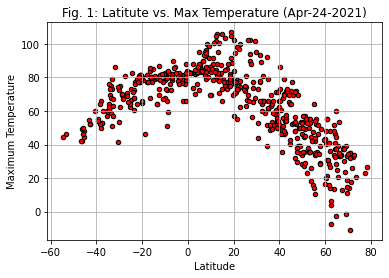

In [44]:
all_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 1: Latitute vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid()
plt.savefig("../output_data/Fig1_city_lat_maxtemp.png")
plt.show()

##### This scatterplot shows that latitudes closer to zero tend to have higher max temperatures, and that there is a parallel max temperature for negative and positive latitudes. 

# Latitude vs. Humidity Plot

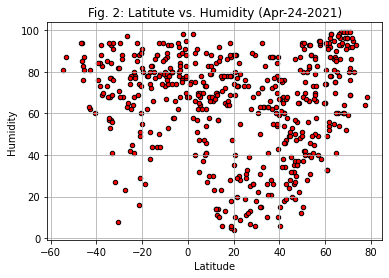

In [45]:
all_df.plot(kind = "scatter", x = "Lat", y = "Humidity", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 2: Latitute vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("../output_data/Fig2_city_lat_humidity.png")
plt.show()

##### This scatterplot shows that absolute humidity is high at a wide range of latitudes.

# Latitude vs. Cloudiness Plot

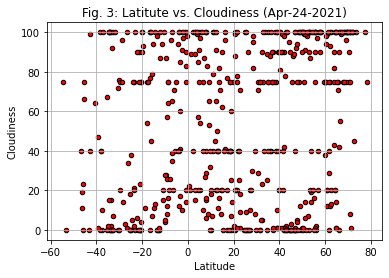

In [46]:
all_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 3: Latitute vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../output_data/Fig3_city_lat_cloudiness.png")
plt.show()

##### This scatterplot shows that cloudiness is fairly equally distributed across latitude - for example it appears that cloudiness at 40 degrees  latitude is almost as often 0 and 100 on the scale of cloudiness. 

# Latitude vs. Wind Speed Plot

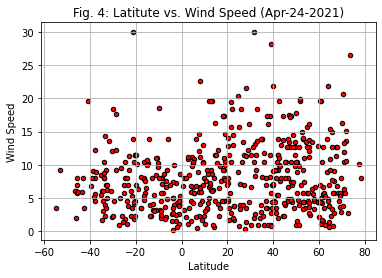

In [47]:
all_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", marker="o", c="red", edgecolors="black")
plt.title(f"Fig. 4: Latitute vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("../output_data/Fig4_city_lat_windspeed.png")
plt.show()

##### This scatterplot shows that wind speed does not appear to correlate with latitude - there are remarkable similar wind speeds across a wide range of latitudes. 

# Linear Regression

In [48]:
#create 2 new DFs
NH_df = all_df.loc[(all_df["Lat"] >=0) ]
#NH_df.describe()
SH_df = all_df.loc[(all_df["Lat"] <0) ]
#SH_df.describe()

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.85


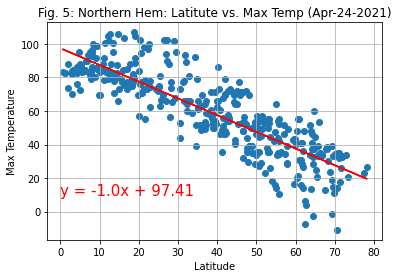

In [85]:
lat_NH = NH_df.iloc[:,1]
max_temp_NH = NH_df.iloc[:,3]
correlation = st.pearsonr(lat_NH, max_temp_NH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = max_temp_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, max_temp_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_NH, max_temp_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Fig. 5: Northern Hem: Latitute vs. Max Temp ({date})")
plt.grid()
plt.savefig("../output_data/Fig5_city_lat_temp_LR_NH.png")
plt.show()

###### In the Northern Hemisphere, as latitude increases, max temperature decreases.  There is a strong, negative relationship between increasing latitude and increasing temperature.

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.73


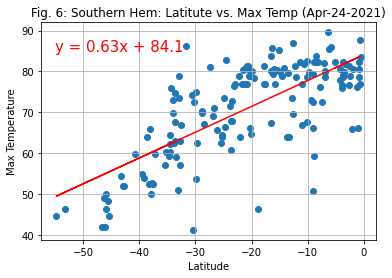

In [78]:
lat_SH = SH_df.iloc[:,1]
max_temp_SH = SH_df.iloc[:,3]
correlation = st.pearsonr(lat_SH, max_temp_SH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = max_temp_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, max_temp_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_SH, max_temp_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"Fig. 6: Southern Hem: Latitute vs. Max Temp ({date})")
plt.grid()
plt.savefig("../output_data/Fig6_city_lat_temp_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, as latitude increases, max temperature also increases.  There is a strong, positive relationship between increasing latitude and increasing temperature.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.24


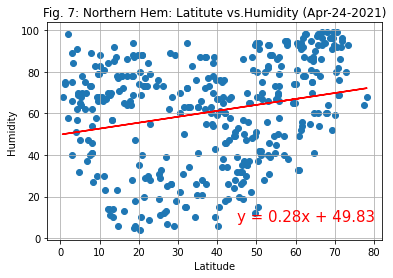

In [79]:
lat_NH = NH_df.iloc[:,1]
humidity_NH = NH_df.iloc[:,4]
correlation = st.pearsonr(lat_NH, humidity_NH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = humidity_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, humidity_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_NH, humidity_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(45,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Fig. 7: Northern Hem: Latitute vs.Humidity ({date})")
plt.grid()
plt.savefig("../output_data/Fig7_city_lat_humid_LR_NH.png")
plt.show()

##### In the Northern Hemisphere, there is a weak, positive relationship between latitude and humidity that borders on no relationship.

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.07


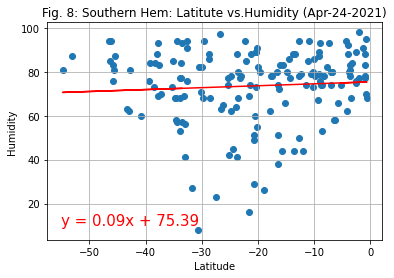

In [80]:
lat_SH = SH_df.iloc[:,1]
humidity_SH = SH_df.iloc[:,4]
correlation = st.pearsonr(lat_SH, humidity_SH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = humidity_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, humidity_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_SH, humidity_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Fig. 8: Southern Hem: Latitute vs.Humidity ({date})")
plt.grid()
plt.savefig("../output_data/Fig8_city_lat_humid_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, there is no relationship between latitude and humidity.   In other words: it is humid down there, pretty much wherever you go.  However, how it feels may be quite different. 

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.18


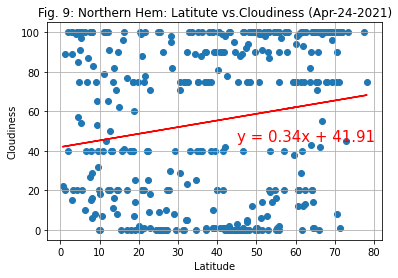

In [81]:
lat_NH = NH_df.iloc[:,1]
cloud_NH = NH_df.iloc[:,5]
correlation = st.pearsonr(lat_NH, cloud_NH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = cloud_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, cloud_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_NH, cloud_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Fig. 9: Northern Hem: Latitute vs.Cloudiness ({date})")
plt.grid()
plt.savefig("../output_data/Fig9_city_lat_clouds_LR_NH.png")
plt.show()

##### In the Northern Hemisphere, there is a weak positive relationship between cloudiness and latitude.    

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.19


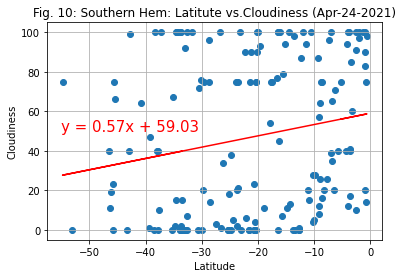

In [82]:
lat_SH = SH_df.iloc[:,1]
cloud_SH = SH_df.iloc[:,5]
correlation = st.pearsonr(lat_SH, cloud_SH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = cloud_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, cloud_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_SH, cloud_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Fig. 10: Southern Hem: Latitute vs.Cloudiness ({date})")
plt.grid()
plt.savefig("../output_data/Fig10_city_lat_clouds_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, there is a weak, positive relationship between cloudiness and latitude.    

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.02


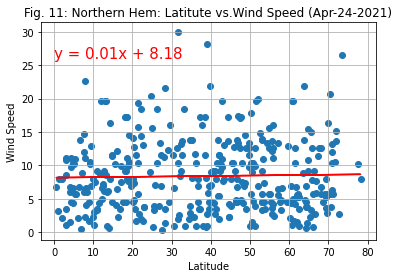

In [83]:
lat_NH = NH_df.iloc[:,1]
wind_NH = NH_df.iloc[:,6]
correlation = st.pearsonr(lat_NH, wind_NH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_NH, y_values = wind_NH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_NH, wind_NH)
regress_values = lat_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_NH, wind_NH)
plt.plot(lat_NH,regress_values,"r-")
plt.annotate(line_eq,(0,26),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Fig. 11: Northern Hem: Latitute vs.Wind Speed ({date})")
plt.grid()
plt.savefig("../output_data/Fig11_city_lat_wind_LR_NH.png")
plt.show()

##### In the Northern Hemisphere, there is no meaningful relationship between wind speed and latitude.    

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.15


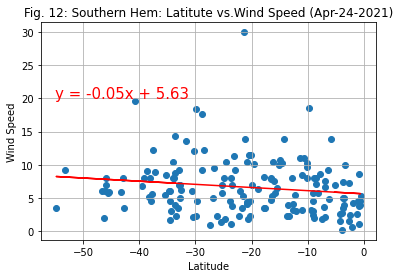

In [84]:
lat_SH = SH_df.iloc[:,1]
wind_SH = SH_df.iloc[:,6]
correlation = st.pearsonr(lat_SH, wind_SH)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
#x_values = lat_SH, y_values = wind_SH
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_SH, wind_SH)
regress_values = lat_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {round(rvalue,2)}")
plt.scatter(lat_SH, wind_SH)
plt.plot(lat_SH,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Fig. 12: Southern Hem: Latitute vs.Wind Speed ({date})")
plt.grid()
plt.savefig("../output_data/Fig12_city_lat_wind_LR_SH.png")
plt.show()

##### In the Southern Hemisphere, there is a weak, negative relationship between wind speed and latitude.    